In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
pdata = pd.read_csv("pima-indians-diabetes-2.csv")

In [6]:
pdata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pdata.shape

(768, 9)

In [8]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
pdata.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [10]:
pdata.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


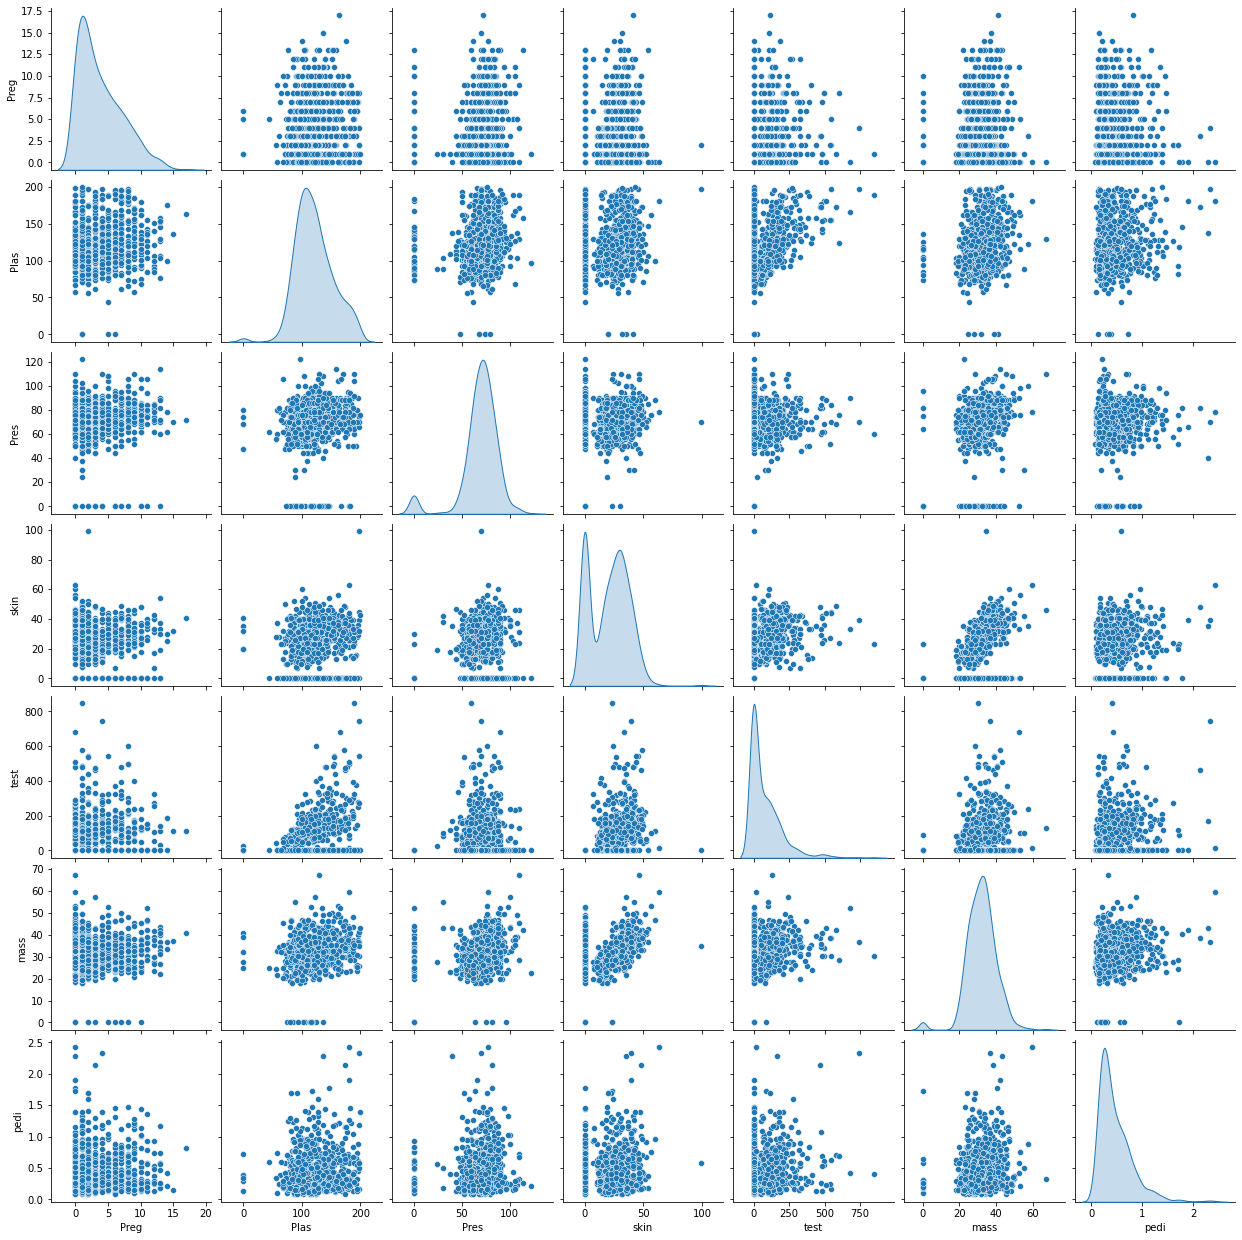

In [11]:
pdata_attr = pdata.iloc[:, 0:7]
sns.pairplot(pdata_attr, diag_kind='kde')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
x = pdata.drop("class", axis = 1)
y = pdata["class"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [15]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Preg is 0.056543816725904444
The coefficient for Plas is 0.03558453499994969
The coefficient for Pres is -0.010877807115262032
The coefficient for skin is -0.0017905432722495757
The coefficient for test is -0.0009890134639923376
The coefficient for mass is 0.10761167026516327
The coefficient for pedi is 0.5239380690533901
The coefficient for age is 0.03582561476466806


In [17]:
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -9.390748128622807


In [18]:
predictions = model.predict(x_test)

In [19]:
model.score(x_train, y_train)

0.7821229050279329

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7402597402597403

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



<AxesSubplot:>

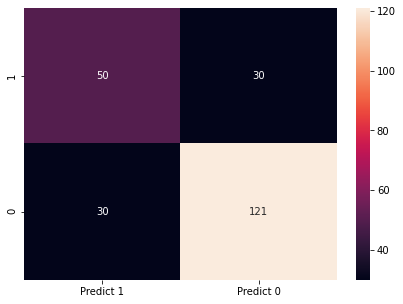

In [22]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions, labels = [1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1", "0"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [23]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [24]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.6926406926406926


In [31]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.7635009310986964
0.7186147186147186


0.7186147186147186


<AxesSubplot:>

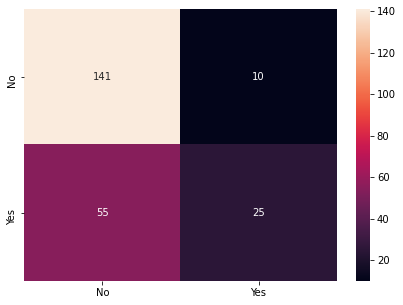

In [32]:
print(dTreeR.score(x_test, y_test))
y_predict = dTreeR.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')